<a href="https://colab.research.google.com/github/mathstat72/Coding-Test/blob/main/Chapter8_%EB%8B%A4%EC%9D%B4%EB%82%98%EB%AF%B9_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 8-1. 피보나치 수열
- 재귀함수로 구현

In [1]:
def fibo(x):
    if x==1 or x==2:
        return 1
    return fibo(x-1) + fibo(x-2)

print(fibo(4))

3


- 메모제이션 기법을 사용해서 구현(다이나믹 프로그래밍)

In [2]:
# 한 번 계산된 결과를 메모제이션하기 위한 리스트 초기화
d = [0] * 100

#피보나치함수를 재귀적으로 구현(탑다운)
def fibo(x):
    # 종료 조건
    if x==1 or x==2:
        return 1
    # 이미 계산한 적 있는 문제라면 그대로 반환
    if d[x] != 0:
        return d[x]
    # 아직 계산하지 않은 문제라면 점화식에 따라서 피보나치 결과를 반환
    d[x] = fibo(x-1) + fibo(x-2)
    return d[x]

print(fibo(99))

218922995834555169026


- 보텀업 방식 풀이

In [9]:
# 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [0] * 100

# 첫 번째 피보나치 수와 두 번째 피보나치 수는 1
d[1] = 1
d[2] = 1
n = 99

# 피보나치 함수 반복문으로 구현(보텀업)
for i in range(3, n+1):
    d[i] = d[i-1] + d[i-2]

print(d[n])

218922995834555169026


## 8-2. 1로 만들기
정수 X가 주어졌을 때, 연산 4개를 적절히 사용해서 1을 만들려고 한다.연산을 사용하는 횟수의 최솟값을 출력하시오.
- 연산1. X가 5로 나누어 떨어지면, 5로 나눈다.
- 연산2. X가 3로 나누어 떨어지면, 3로 나눈다.
- 연산3. X가 2로 나누어 떨어지면, 2로 나눈다.
- 연산4. X에서 1을 뺀다.




In [10]:
# 정수 X 입력받기
x = int(input())

# 앞서 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [0] * 30001

# 다이나믹 프로그래밍 진행 (보텀업)
for i in range(2, x+1):
    # 현재의 수에서 1을 빼는 경우
    d[i] = d[i-1] + 1
    # 현재의 수가 2로 나누어 떨어지는 경우
    if i % 2 == 0:
        d[i] = min(d[i], d[i//2]+1)
    # 현재의 수가 3으로 나누어 떨어지는 경우
    if i % 3 == 0:
        d[i] = min(d[i], d[i//3]+1)
    # 현재의 수가 5로 나누어 떨어지는 경우
    if i % 5 == 0:
        d[i] = min(d[i], d[i//5]+1)

print(d[x])

26
3


## 8-3. 개미전사
개미 전사는 식량창고가 일직선상일 때 최대한 많은 식량을 얻기를 원한다. 개미 전사를 위해 식량창고 N개에 대한 정보가 주어졌을 때 얻을 수 있는 식량의 최댓값을 구하는 프로그램을 작성하시오.

In [11]:
# 정수 N 입력받기
n = int(input())

# 모든 식량 정보 입력받기
array = list(map(int, input().split()))

# 앞서 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [0]*100

# 다이나믹 프로그래밍 진행(보텀업)
d[0] = array[0]
d[1] = max(array[0], array[1])
for i in range(2, n):
    d[i] = max(d[i-1], d[i-2] + array[i])

# 계산된 결과 출력
print(d[n-1])

4
1 3 1 5
8


## 8-4. 바닥 공사
가로의 길이가 N, 세로의 길이가 2인 직사각형 형태의 얇은 바닥이 있다. 태일이는 이 얇은 바닥을 1X2의 덮개, 2X1의 덥개, 2X2의 덮개를 이용해 채우고자 한다.
이때 바닥을 채우는 경우의 수를 구하는 프로그램을 작성하시오.

In [12]:
# 정수 N 입력받기
n = int(input())

# 앞서 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [0] * 1001

# 다이나믹 프로그래밍 진행(보텀업)
d[1] = 1
d[2] = 3
for i in range(3, n+1):
    d[i] = (d[i-1] + 2 * d[i-2]) % 796796

# 계산된 결과 출력
print(d[n])

3
5


## 8-5. 효율적인 화폐 구성
N가지 종류의 화폐가 있다. 이 화폐들의 개수를 최소한으로 이용해서 그 가치의 합이 M원이 되도록 하려고 한다. 이때 각 화폐는 몇 개라도 사용할 수 있으며, 사용한 화폐의 구성은 같지만 순서만 다른 것은 같은 경우로 구분한다.

In [15]:
# 정수 N, M 입력받기
n, m = map(int, input().split())

# N개의 화폐 단위 정보 입력받기
array = []
for i in range(n):
    array.append(int(input()))

# 한 번 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [10001] * (m+1)

# 다이나믹 프로그래밍 진행(보텀업)
d[0] = 0
for i in range(n):
    for j in range(array[i], m+1):
        if d[j - array[i]] != 10001:  #(i-k)원을 만드는 방법이 존재하는 경우
            d[j] = min(d[j], d[j-array[i]]+1)

# 계산된 결과 출력
if d[m] == 10001:  #최종적으로 M원을 만드는 방법이 없는 경우
    print(-1)
else:
    print(d[m])

2 15
2
3
5


In [14]:
# 정수 N, M 입력받기
n, m = map(int, input().split())

# N개의 화폐 단위 정보 입력받기
array = []
for i in range(n):
    array.append(int(input()))

# 한 번 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [10001] * (m+1)

# 다이나믹 프로그래밍 진행(보텀업)
d[0] = 0
for i in range(n):
    for j in range(array[i], m+1):
        if d[j - array[i]] != 10001:  #(i-k)원을 만드는 방법이 존재하는 경우
            d[j] = min(d[j], d[j-array[i]]+1)

# 계산된 결과 출력
if d[m] == 10001:  #최종적으로 M원을 만드는 방법이 없는 경우
    print(-1)
else:
    print(d[m])

3 4
3
5
7
-1


## [기출문제] 1. 금광
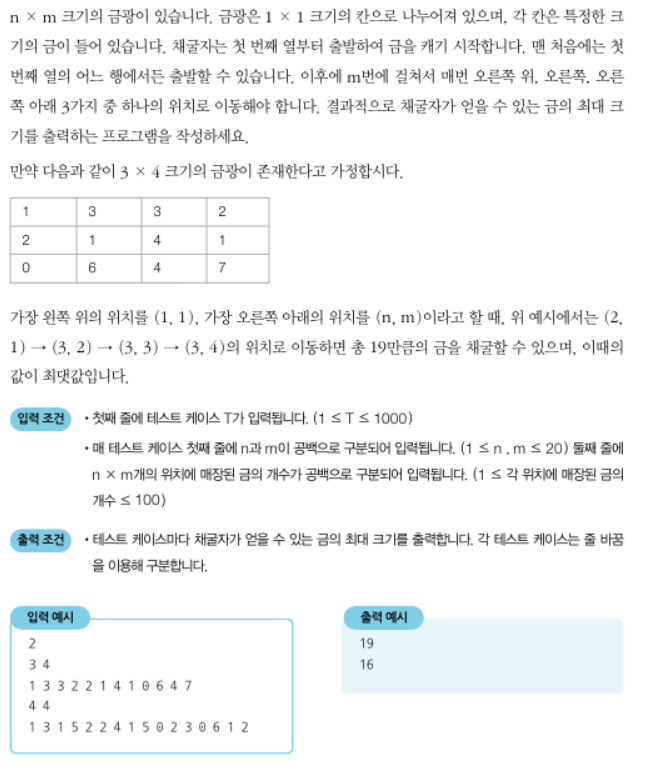

In [21]:
## 테스트 케이스 입력
for tc in range(int(input())) :
    # 금광 정보 입력
    n, m = map(int, input().split())
    arr = list(map(int, input().split()))

    # 다이나믹 프로그래밍을 위한 2차원 DP 테이블 초기화
    dp = []
    index = 0
    for i in range(n) :
        dp.append(arr[index: index + m])
        index += m

    # 다이나믹 프로그래밍 진행
    for j in range(1, m) :
        for i in range(n) :
            # 왼쪽 위에서 오는 경우
            if i == 0:
                left_up = 0
            else :
                left_up = dp[i - 1][j - 1]
            # 왼쪽 아래서 오는 경우
            if i == n - 1 :
                left_down = 0
            else :
                left_down = dp[i + 1][j - 1]
            # 왼쪽에서 오는 경우
            left = dp[i][j - 1]
            dp[i][j] = dp[i][j] + max(left_up, left_down, left)
            
    result = 0
    for i in range(n) :
        result = max(result, dp[i][m - 1])
    print(result)

2
3 4
1 3 3 2 2 1 4 1 0 6 4 7
19
4 4
1 3 1 5 2 2 4 1 5 0 2 3 0 6 1 2
16


## [기출문제] 2. 정수 삼각형


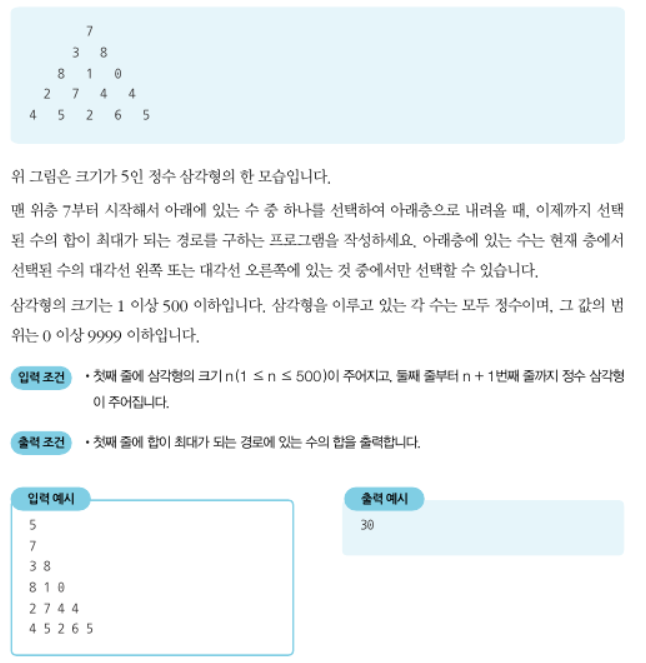

In [26]:
n = int(input())
triangles = []  # 다이나믹 프로그래밍을 위한 DP 테이블 초기화

for _ in range(n):
    triangles.append(list(map(int,input().split())))

# 다이나믹 프로그래밍으로 두 번째 줄부터 내려가면서 확인
for i in range(1,n):
    for j in range(i+1):
        # 왼쪽 위에서 내려오는 경우
        if j == 0:
            up_left = 0
        else:
            up_left = triangles[i-1][j-1]
        # 바로 위에서 내려오는 경우
        if i == j:
            up = 0
        else:
            up = triangles[i-1][j]
        # 최대 합을 저장
        triangles[i][j] = triangles[i][j] + max(up,up_left)
        
print(max(triangles[n-1]))

5
7
3 8
8 1 0
2 7 4 4
4 5 2 6 5
30
